In [1]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
# Loading the CSV file into a DataFrame
crypto_df = pd.read_csv("Resources/crypto_data.csv")
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
# Finding the Datatype each column uses (notice how there is a boolean and a float)
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [6]:
# Dropping the "IsTrading" column as there is no use to it for the unsupervised programs (as it is a boolean)
# (I decided to make a new dataframe for changes so the original is unaffected)
crypto_df_clean = crypto_df.drop(columns = "IsTrading")
crypto_df_clean

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,PoW/PoS,NaN,21000000


In [7]:
# Checking for Null Values and delete if there is any (notice how after it was run there are 508 null values)
crypto_df_clean.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [8]:
# Remove said null values and then re-verify to ensure its removal
crypto_df_clean = crypto_df_clean.dropna()
crypto_df_clean.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [9]:
# Checking the current state of the DataFrame being cleaned up for use
crypto_df_clean

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [10]:
# Drop the columns "Unnamed: 0" and "CoinName" as they are no use to the dataset (much like the "IsTrading" column)
# (In this case they're primarily just strings rather than numerical data)
crypto_df_clean.drop(["Unnamed: 0", "CoinName"], axis = 1, inplace = True) # (Oddly this gives me a warning, but from
                                                                           # research it is not affecting anything)

C:\Users\Mark Werden\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# Verifying the columns were dropped
crypto_df_clean # (The columns were still dropped as normal, so it appears to be fine)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [14]:
# Saving the cleaned DataFrame (more out of habit than anything, but its good to have an external copy)
crypto_df_clean.to_csv("Resources/Crypto Data (Cleaned).csv")

In [15]:
# Making another dataframe where the "Algorithm" and "Prooftype" are converted to numerical data with dummies
# (This was suggested online as it would keep the cleaned dataframe unaffected in case it is needed for something)
converted_df = pd.get_dummies(crypto_df_clean, columns=["Algorithm", "ProofType"], drop_first = True, dtype = float)

In [16]:
# Verify the changes have been made
converted_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247,1.283270e+05,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Verify the new columns' datatypes (they are all float, as is intended)
converted_df.dtypes

TotalCoinsMined                   float64
TotalCoinSupply                    object
Algorithm_536                     float64
Algorithm_Argon2                  float64
Algorithm_Argon2d                 float64
                                   ...   
ProofType_Proof of Authority      float64
ProofType_Proof of Trust          float64
ProofType_TPoS                    float64
ProofType_Zero-Knowledge Proof    float64
ProofType_dPoW/PoW                float64
Length: 111, dtype: object

In [18]:
# Standardizing the data by using the Scaler function (it will help for future calculations in the unsupervised models)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(converted_df)

In [19]:
# Using the actual unsupervised models (Dimensionality Reduction using PCA)
pca = PCA(n_components=0.90) # (It was suggested to preserve 90% of the explained variance in the assignment details)
crypto_pca = pca.fit_transform(scaled_df)

In [20]:
# Showing the action was completed
crypto_pca

array([[-2.23404598e-01,  1.30381502e+00, -4.22454248e-01, ...,
         2.76419269e-15, -2.56843612e-15,  5.37191360e-16],
       [-2.08335383e-01,  1.30264662e+00, -4.23020514e-01, ...,
         2.93966491e-15, -2.41671699e-15,  3.58942193e-16],
       [-1.57112263e-01,  8.30423028e-01, -2.59254566e-01, ...,
        -6.97070615e-16, -1.93602217e-14, -1.81672174e-15],
       ...,
       [-2.50942668e-01, -2.05164449e+00,  2.14938013e-01, ...,
         3.91569844e-15, -4.30931317e-15,  1.77082460e-15],
       [-9.48877169e-02,  7.79281044e-01, -1.81224295e-01, ...,
         5.26125915e-15, -4.66506838e-15,  3.50960727e-15],
       [-2.23097681e-01,  1.30379122e+00, -4.22465782e-01, ...,
         2.94067320e-15, -2.48745852e-15,  2.97672539e-16]])

In [21]:
# Converting the data into a DataFrame for easier reading
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.223405,1.303815,-0.422454,-2.923183e-07,3.034768e-11,-6.561661e-11,-3.050339e-10,0.007193,-1.056819,-0.322751,...,-1.518104e-15,-1.890400e-15,-6.833585e-16,1.654868e-15,-2.232755e-15,-2.296011e-15,-1.558525e-15,2.764193e-15,-2.568436e-15,5.371914e-16
1,-0.208335,1.302647,-0.423021,-2.923183e-07,3.034750e-11,-6.561761e-11,-3.050337e-10,0.005725,-1.060162,-0.323532,...,-1.320895e-15,-1.715868e-15,-6.706678e-16,1.415547e-15,-2.156745e-15,-2.315541e-15,-1.667293e-15,2.939665e-15,-2.416717e-15,3.589422e-16
2,-0.157112,0.830423,-0.259255,-2.088244e-07,2.167882e-11,-4.687487e-11,-2.179115e-10,-0.005728,-0.664388,-0.118785,...,-4.344636e-15,-7.159762e-15,-5.201344e-15,-9.916384e-15,5.209533e-16,-1.158699e-14,1.017944e-14,-6.970706e-16,-1.936022e-14,-1.816722e-15
3,0.292642,1.999551,-0.450115,-4.198578e-07,4.358725e-11,-9.424196e-11,-4.381249e-10,-0.040673,-0.807998,-0.256621,...,7.873704e-15,3.223647e-14,-6.732707e-15,-6.878928e-14,3.100696e-14,5.447251e-14,2.981584e-14,1.684144e-15,-5.905409e-14,-3.124433e-14
4,-0.187340,-1.489209,0.102310,1.751325e-07,-1.818068e-11,3.930976e-11,1.827579e-10,-0.000737,-0.033334,0.068031,...,-3.745964e-15,-3.180738e-15,-5.239676e-15,-1.241674e-14,2.008994e-15,-9.041871e-15,1.033818e-14,-2.542366e-16,-2.045604e-14,-1.401797e-15


In [22]:
# Fetching the Explained Variance (for clarification, each number instance is a "feature", and these "features" are being
# compared to the original "converted_df" dataframe)
pca.explained_variance_ratio_

array([0.02007346, 0.01887721, 0.01809276, 0.01804227, 0.01804227,
       0.01804227, 0.01804227, 0.01800689, 0.01582908, 0.01540458,
       0.01441551, 0.0142354 , 0.01303879, 0.01296145, 0.01262477,
       0.01191204, 0.01110488, 0.01078403, 0.01034097, 0.00974445,
       0.0092698 , 0.00923725, 0.00920406, 0.00915955, 0.00914055,
       0.00912601, 0.00910083, 0.00908251, 0.00908168, 0.00907735,
       0.00907555, 0.00906941, 0.00906466, 0.00906262, 0.00905976,
       0.00905771, 0.00905721, 0.00905268, 0.00904682, 0.00904548,
       0.00904548, 0.00903996, 0.00903859, 0.00903725, 0.00903677,
       0.00903371, 0.00903329, 0.00903329, 0.00903329, 0.00903254,
       0.00903031, 0.00902709, 0.00902114, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902

Data Observation: When preserving 90% of the data, it led to the reduction of features from 111 to 87.

In [25]:
# Using t-SNE to further narrow the dataset
tSNE = TSNE(learning_rate=35)
tSNE_features = tSNE.fit_transform(crypto_pca_df)

In [26]:
# Checking if the dataset has two 2 columns (this is for the scatterplot later) [and it does, so that is good]
tSNE_features.shape

(744, 2)

In [27]:
# Creating the x and y planes for the scatterplot
crypto_pca_df["x"] = tSNE_features[:,0]
crypto_pca_df["y"] = tSNE_features[:,1]

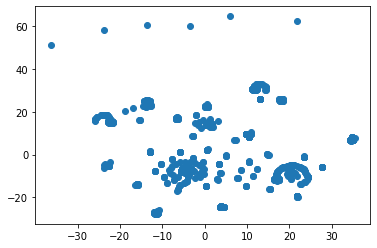

In [28]:
# Showing the scatterplot using the created planes
plt.scatter(crypto_pca_df["x"], crypto_pca_df["y"])
plt.show()

Data Observation: Just from this scatterplot alone, I can tell that there are a few distinct clusters that exist within the graph.

In [29]:
# Using Cluster Analysis with k-Means
inertia = []
k = list(range(1,11))

for i in k:
    k_means = KMeans(n_clusters = i, random_state = 0) # (This calcualtes the inertia for the range of k-values, and in of
    k_means.fit(crypto_pca_df)                         # itself "inertia" is the measurement of how well a dataset is
    inertia.append(k_means.inertia_)                   # clustered by K-Means)
    
elbow_curve_data = {"k": k, "inertia": inertia}
elbow_curve_df = pd.DataFrame(data=elbow_curve_data) # (This section of code converts it to a DataFrame so it can be read
elbow_curve_df.head()                                # by the planned graph)

# (Note: After running the program, it gave me a warning about memory leaking. From research it should be okay as its the
# only instance of this happening)

C:\Users\Mark Werden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,448575.000367
1,2,285128.679031
2,3,198731.509381
3,4,155225.614954
4,5,137397.865018


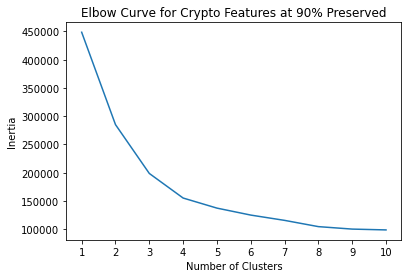

In [30]:
# Plotting the dataframe to find the best value for "k"
plt.plot(elbow_curve_df["k"], elbow_curve_df["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Crypto Features at 90% Preserved")
plt.show()

Data Observation: Based on the line graph, the best "k" value is about 4 clusters, as that is where the line begins to change more dramatically.

### Concluding Recommendation
Despite my limited understanding of Cryptocurrencies, based on the data results I can say that it is possible for said currency to be clustered together. My approximation for how many groups that can exist at once is about 4 clusters.